In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv('/kaggle/input/nyc-yellow-taxi-trip-data/yellow_tripdata_2015-01.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/nyc-yellow-taxi-trip-data/yellow_tripdata_2015-01.csv'

In [ ]:
df.shape

(12748986, 19)

In [ ]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RateCodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

# Part A
## - Univariate Analysis

In [ ]:
def printanalysis(col):
    print(f"""
    Mean: {df[col].mean()}
    Median: {df[col].median()}
    Mode: {df[col].mode().tolist()}   # mode() can return multiple values
    Min: {df[col].min()}
    Max: {df[col].max()}
    Standard Deviation: {df[col].std()}
    Variance: {df[col].var()}
    Skewness: {df[col].skew()}
    Kurtosis: {df[col].kurt()}
    Count (non-null): {df[col].count()}
    Missing Values: {df[col].isna().sum()}
    """)

In [ ]:
printanalysis('passenger_count')


    Mean: 1.6814908260154964
    Median: 1.0
    Mode: [1]   # mode() can return multiple values
    Min: 0
    Max: 9
    Standard Deviation: 1.3379235173495294
    Variance: 1.7900393382769364
    Skewness: 2.085021873219351
    Kurtosis: 3.2101144352055297
    Count (non-null): 12748986
    Missing Values: 0
    


In [ ]:
printanalysis('trip_distance')


    Mean: 13.459129611562835
    Median: 1.68
    Mode: [0.9]   # mode() can return multiple values
    Min: 0.0
    Max: 15420004.5
    Standard Deviation: 9844.094218363605
    Variance: 96906190.98001978
    Skewness: 1148.770999057747
    Kurtosis: 1429174.2182317632
    Count (non-null): 12748986
    Missing Values: 0
    


In [ ]:
printanalysis('total_amount')


    Mean: 15.108294537306733
    Median: 11.16
    Mode: [6.8]   # mode() can return multiple values
    Min: -450.3
    Max: 3950611.6
    Standard Deviation: 1106.503246711004
    Variance: 1224349.434981993
    Skewness: 3569.8864576353026
    Kurtosis: 12745721.262907958
    Count (non-null): 12748986
    Missing Values: 0
    


In [ ]:
printanalysis('extra')


    Mean: 0.30827895724412907
    Median: 0.0
    Mode: [0.0]   # mode() can return multiple values
    Min: -79.0
    Max: 999.99
    Standard Deviation: 0.5916643112415778
    Variance: 0.35006665719697067
    Skewness: 775.0177590934144
    Kurtosis: 1044564.5073400945
    Count (non-null): 12748986
    Missing Values: 0
    


In [ ]:
printanalysis('tip_amount')


    Mean: 1.8538136460421244
    Median: 1.0
    Mode: [0.0]   # mode() can return multiple values
    Min: -92.42
    Max: 3950588.8
    Standard Deviation: 1106.4323142043368
    Variance: 1224192.465915564
    Skewness: 3570.547192563418
    Kurtosis: 12748866.834455
    Count (non-null): 12748986
    Missing Values: 0
    


In [ ]:
columns=['passenger_count','trip_distance','fare_amount','total_amount','tip_amount','extra']

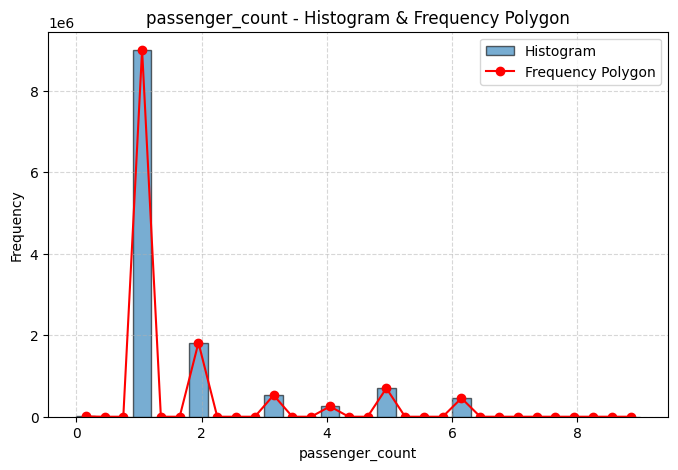

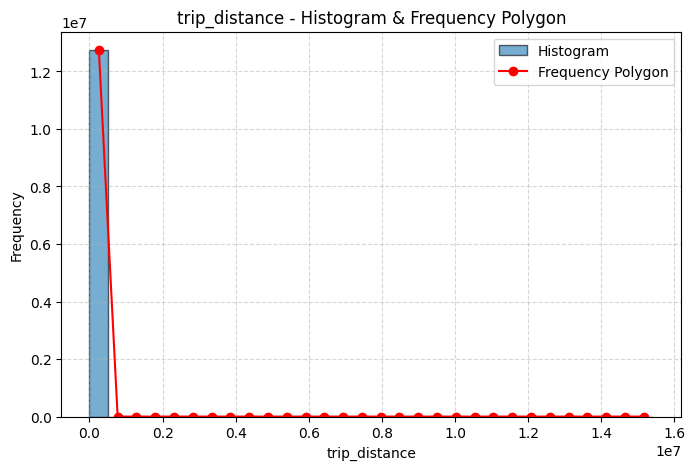

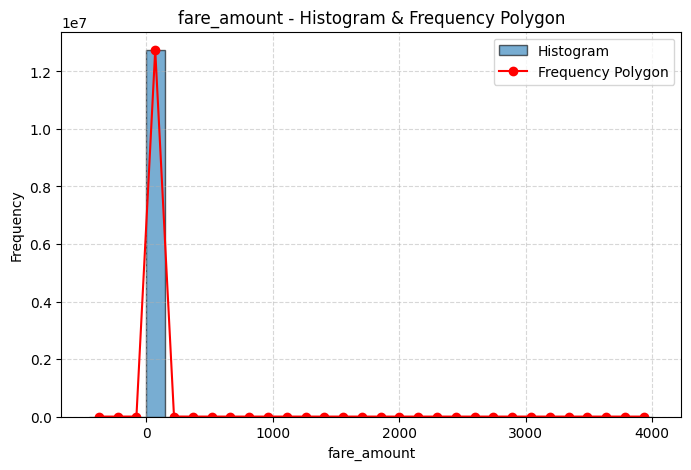

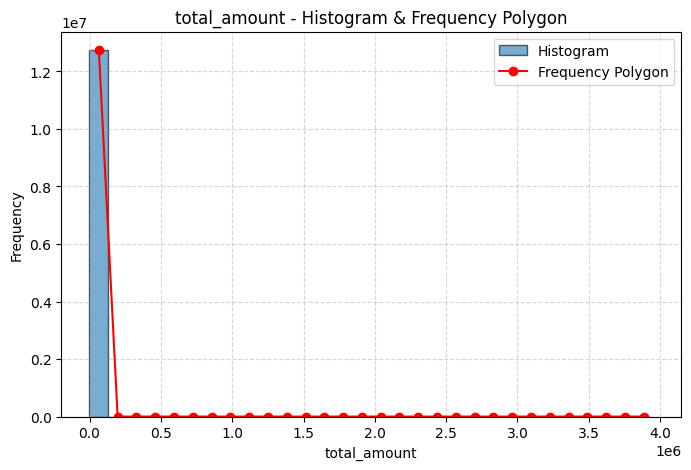

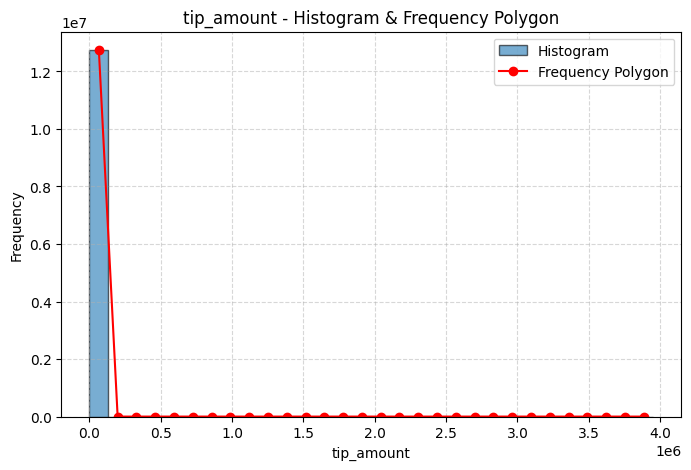

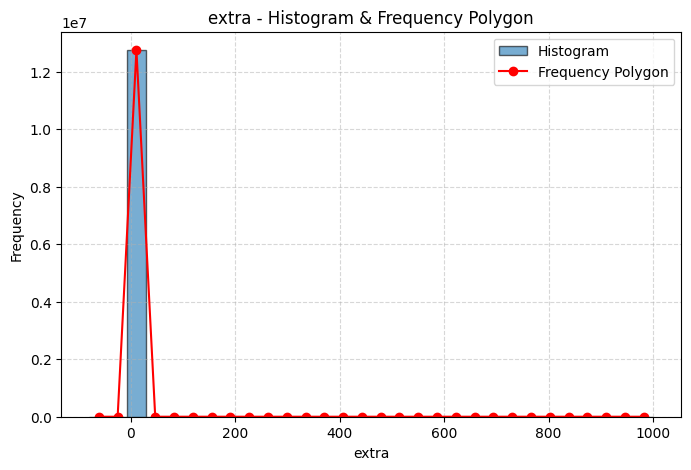

In [ ]:
for col in columns:
    plt.figure(figsize=(8,5))
    
    # Histogram
    counts, bins, patches = plt.hist(
        df[col].dropna(), 
        bins=30, 
        alpha=0.6, 
        edgecolor='black', 
        label='Histogram'
    )
    
    # Frequency polygon (line over the histogram)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    plt.plot(bin_centers, counts, color='red', marker='o', label='Frequency Polygon')
    
    plt.title(f"{col} - Histogram & Frequency Polygon")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

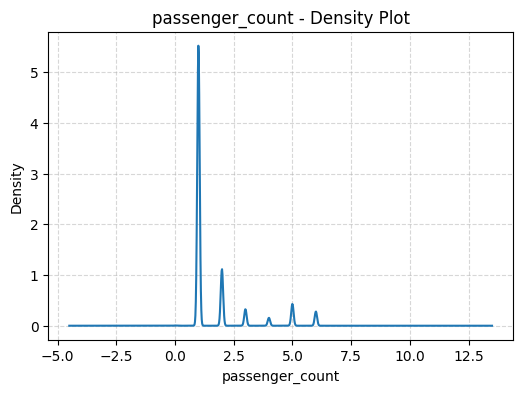

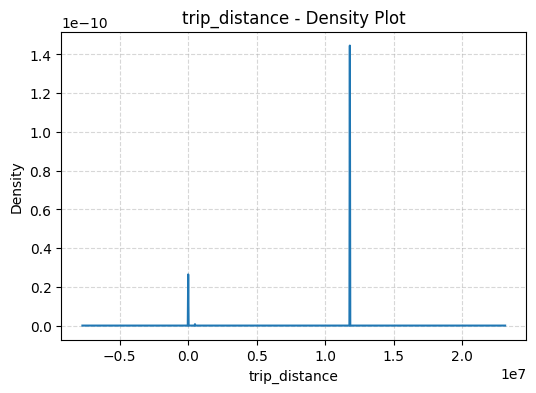

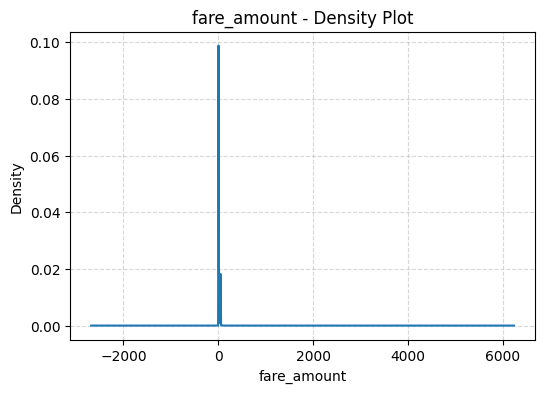

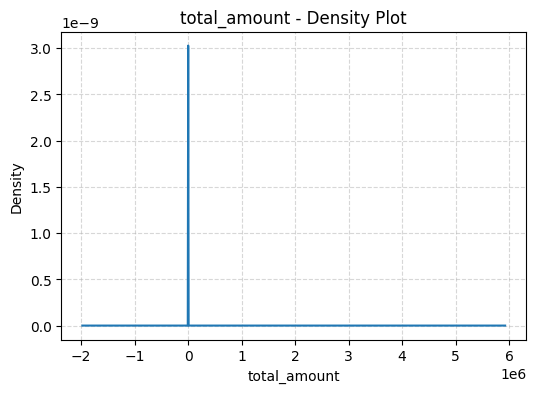

KeyboardInterrupt: 

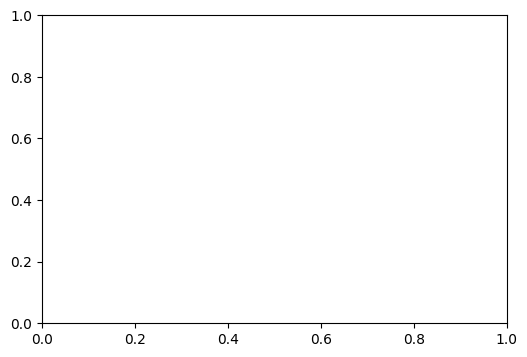

In [ ]:
for col in columns:
    plt.figure(figsize=(6,4))
    df[col].dropna().plot(kind='density')
    plt.title(f"{col} - Density Plot")
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

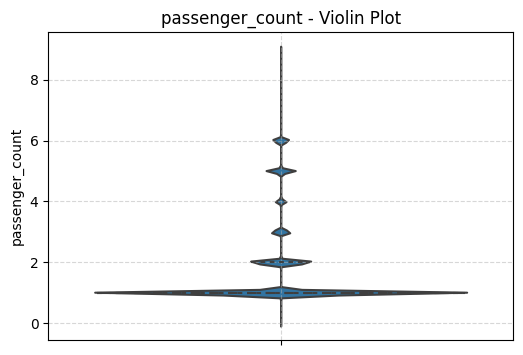

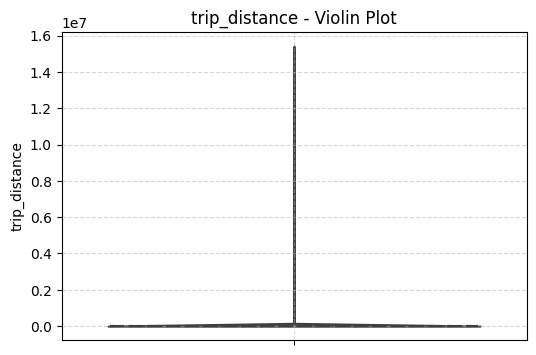

KeyboardInterrupt: 

<Figure size 600x400 with 0 Axes>

In [ ]:
for col in columns:
    plt.figure(figsize=(6,4))
    sns.violinplot(y=df[col], inner="quartile")  # inner quartile lines inside violin
    plt.title(f"{col} - Violin Plot")
    plt.ylabel(col)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

In [ ]:
pearson_td_fare = df['trip_distance'].corr(df['fare_amount'], method='pearson')
pearson_fare_tip = df['fare_amount'].corr(df['tip_amount'], method='pearson')

spearman_td_fare = df['trip_distance'].corr(df['fare_amount'], method='spearman')
spearman_fare_tip = df['fare_amount'].corr(df['tip_amount'], method='spearman')

print(f"Pearson (Trip_distance vs Fare_amount): {pearson_td_fare}")
print(f"Pearson (Fare_amount vs Tip_amount): {pearson_fare_tip}")
print(f"Spearman (Trip_distance vs Fare_amount): {spearman_td_fare}")
print(f"Spearman (Fare_amount vs Tip_amount): {spearman_fare_tip}")


Pearson (Trip_distance vs Fare_amount): 0.00044221179558368056
Pearson (Fare_amount vs Tip_amount): 0.0013981626102069376
Spearman (Trip_distance vs Fare_amount): 0.9338084154430518
Spearman (Fare_amount vs Tip_amount): 0.3675257774739462


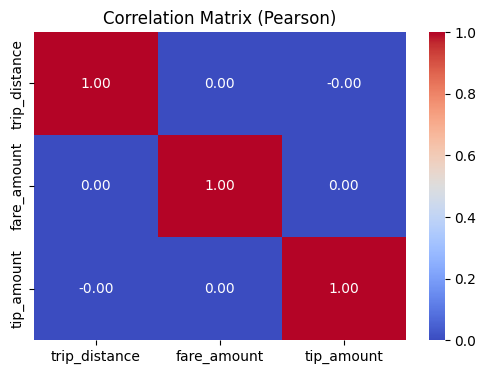

In [ ]:
num_cols = ['trip_distance', 'fare_amount', 'tip_amount']

corr_matrix = df[num_cols].corr(method='pearson')

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Pearson)")
plt.show()


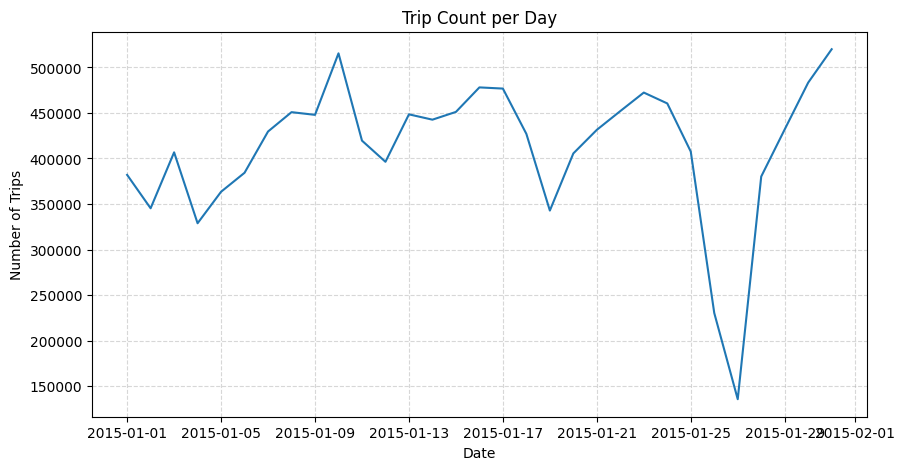

In [ ]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

daily_trips = df.groupby(df['tpep_pickup_datetime'].dt.date).size()

plt.figure(figsize=(10,5))
daily_trips.plot()
plt.title("Time Series Plot")
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

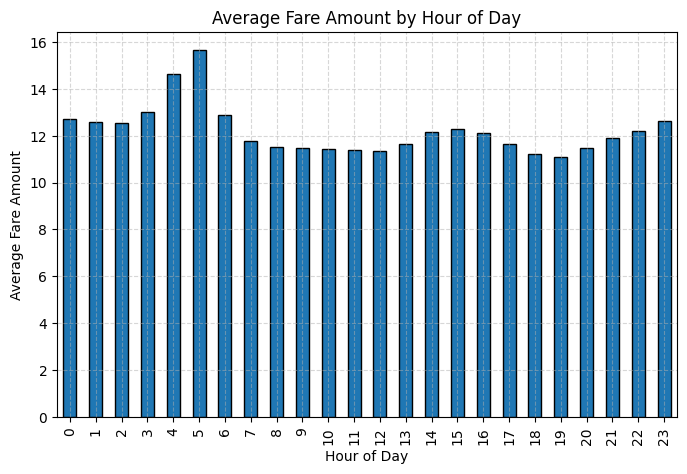

In [ ]:
df['hour'] = df['tpep_pickup_datetime'].dt.hour

fare_by_hour = df.groupby('hour')['fare_amount'].mean()

plt.figure(figsize=(8,5))
fare_by_hour.plot(kind='bar', edgecolor='black')
plt.title("Average Fare Amount by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Fare Amount")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()